In [1]:
import numpy as np
import pickle as rick
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u
from astropy.table import Table
from astropy.io import fits
import scipy.stats as sps

In [2]:
%run "/home/cody/Binary Search/bayesian likelihood/synthetic_fractions.py"
%run "/home/cody/Binary Search/bayesian likelihood/error_with_jitter.py"
%run "/home/cody/Binary Search/bayesian likelihood/binary_fraction.py"

In [2]:
lmc = rick.load(open("/home/cody/Binary Search/all-average-lmc.pck", 'rb'))
smc = rick.load(open("/home/cody/Binary Search/all-average-smc.pck", 'rb'))

In [3]:
lmc[0]

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,MY_NVISITS,ISO_MEANM,ISO_MEDIANM,ISO_STDM,ISO_MEANL,ISO_MEDIANL,ISO_STDL,ISO_MEANR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass,solMass,solMass,solLum,solLum,solLum,solRad
object,object,object,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32

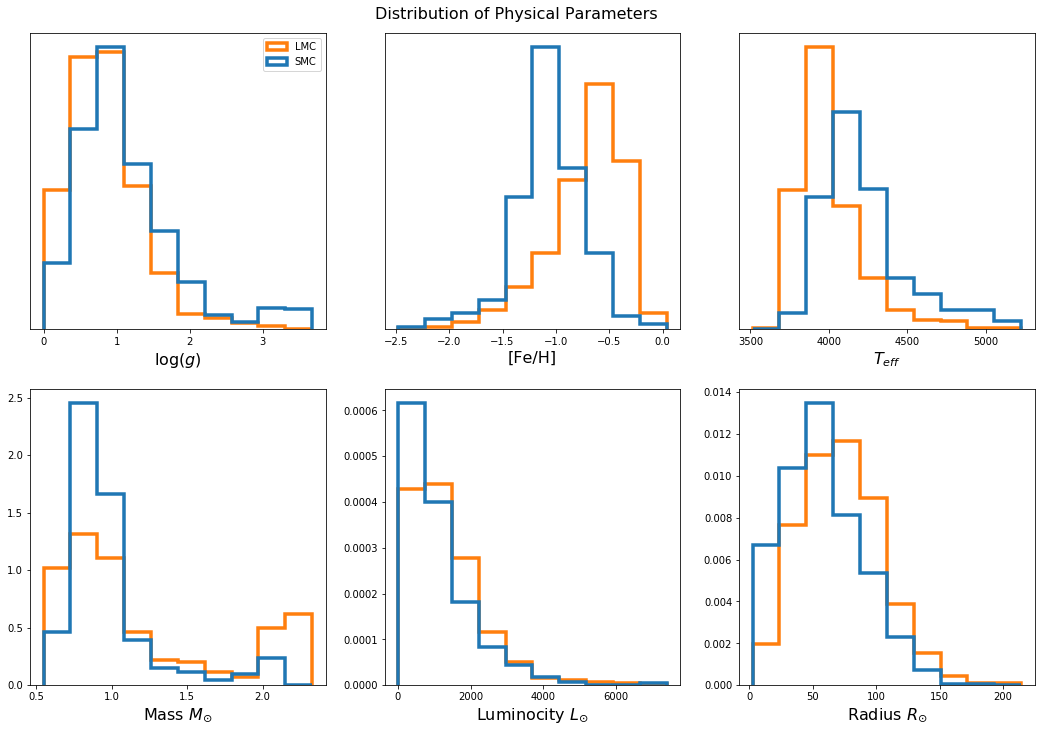

In [4]:
fig, ax = plt.subplots(2, 3, figsize = (18,12))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax[0][0].hist([smc['LOGG'], lmc['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[0][1].hist([smc['FE_H'], lmc['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[0][2].hist([smc['TEFF'], lmc['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[1][0].hist([smc['ISO_MEANM'], lmc['ISO_MEANM']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1][1].hist([smc['ISO_MEANL'], lmc['ISO_MEANL']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[1][2].hist([smc['ISO_MEANR'], lmc['ISO_MEANR']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0][0].legend()

ax[0][0].set_xlabel("$\log(g)$", size = 16)
ax[0][1].set_xlabel("[Fe/H]", size = 16)
ax[0][2].set_xlabel("$T_{eff}$", size = 16)

ax[1][0].set_xlabel("Mass $M_{\odot}$", size = 16)
ax[1][1].set_xlabel("Luminocity $L_{\odot}$", size = 16)
ax[1][2].set_xlabel("Radius $R_{\odot}$", size = 16)

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])


fig.suptitle("Distribution of Physical Parameters", size = 16, y = 0.91)
fig.savefig('properties-hist.pdf')
plt.show()

In [12]:
fraction_lmc = synthetic_fractions(200,
                                   lmc,
                                   0.2,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [13]:
fraction_smc = synthetic_fractions(200,
                                   smc,
                                   0.6,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [14]:
# Adds the extra jitter to the errors
a, b = 0.6, 0.6
lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], a, b, lmc['LOGG'])
lmc_detection = binary_fraction(lmc['RADIALV'], lmc_err_j)
smc_err_j = error_with_jitter(smc['RADIAL_ERR'], a, b, smc['LOGG'])
smc_detection = binary_fraction(smc['RADIALV'], smc_err_j)

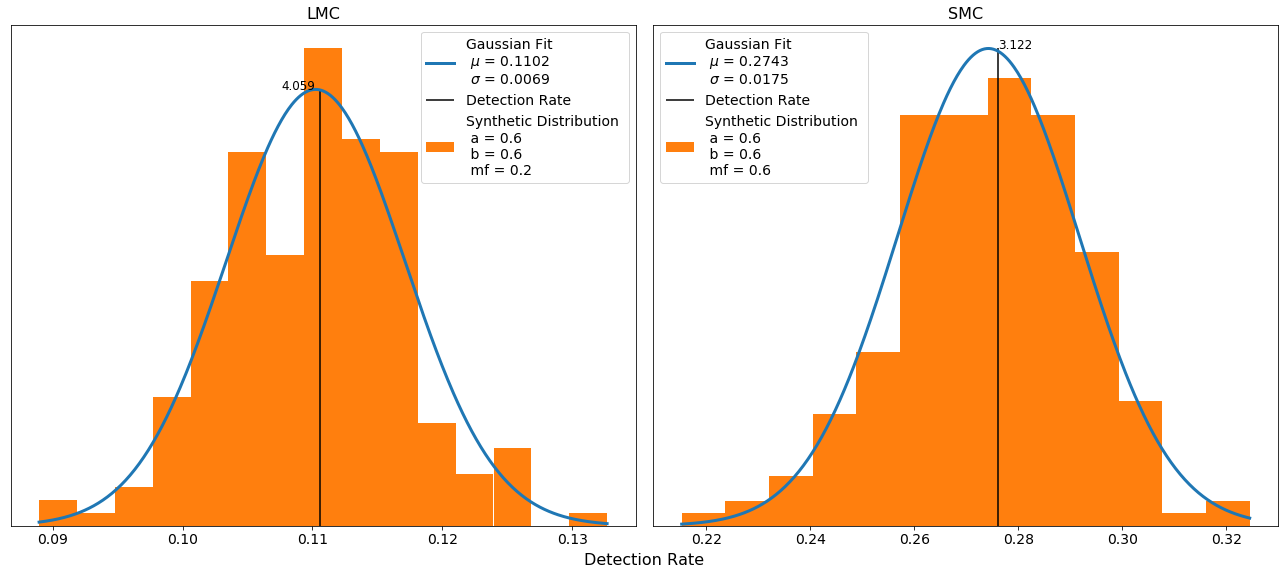

In [15]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 500)

smc_mean = np.mean(fraction_smc)
smc_std = np.std(fraction_smc)
smc_skew = sps.skew(fraction_smc)

lnl_SMC = -1/2*((smc_detection - smc_mean)**2 / smc_std**2 + np.log(2*np.pi * smc_std**2))

xs = np.linspace(min(fraction_smc), max(fraction_smc), 500)

ax[0].plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
ax[0].hist(fraction_lmc, bins = 'auto', density = True)
ax[0].vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)))
ax[0].set_yticks([])
ax[0].set_title("LMC", size = 16)
ax[0].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(lmc_mean, 4, lmc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.2"],
             prop = {"size":14}) 
ax[0].text(lmc_detection-.003,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)

ax[1].plot(xs, sps.norm.pdf(xs, smc_mean, smc_std), linewidth = 3)
ax[1].hist(fraction_smc, bins = 'auto', density = True)
ax[1].vlines(smc_detection, 0, max(sps.norm.pdf(xs, smc_mean, smc_std)))
ax[1].set_yticks([])
ax[1].set_title("SMC", size = 16)
ax[1].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(smc_mean, 4, smc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.6"],
             prop = {"size":14}, loc = 2)
ax[1].text(smc_detection,
           max(sps.norm.pdf(xs, smc_mean, smc_std))
           , "{0:.{1}f}".format(lnl_SMC,3), fontsize=12)

ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
# fig.savefig("synthetic-example.pdf")
plt.show()

In [16]:
lmc_error_j = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.6, lmc['LOGG'])
smc_error_j = error_with_jitter(smc['RADIAL_ERR'], 0.5, 0.6, smc['LOGG'])

lmc_detection = binary_fraction(lmc['RADIALV'], lmc_error_j)
smc_detection = binary_fraction(smc['RADIALV'], smc_error_j)

In [17]:
rick.dump(fraction_lmc, open("fractions-lmc", "wb"))

In [18]:
fraction_lmc_1 = synthetic_fractions(200,
                                   lmc,
                                   0.5,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.3,
                                   0.6)

In [19]:
fraction_lmc_2 = synthetic_fractions(200,
                                   lmc,
                                   0.35,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.4,
                                   0.6)

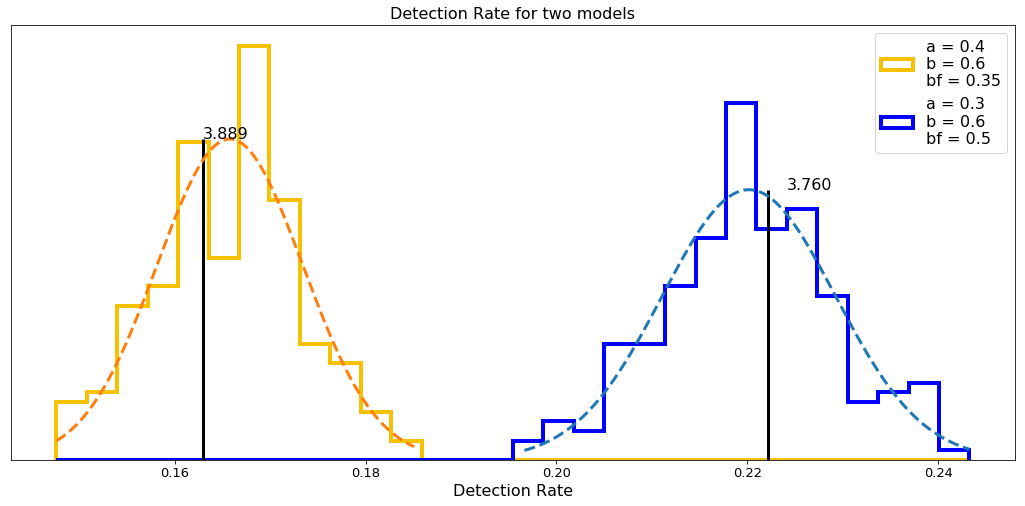

In [20]:
fig = plt.figure(figsize = (18,8))
# Plot the Gaussian Fit
lmc_mean = np.mean(fraction_lmc_1)
lmc_std = np.std(fraction_lmc_1)
lmc_skew = sps.skew(fraction_lmc_1)
xl = np.linspace(min(fraction_lmc_1), max(fraction_lmc_1), 500)
plt.plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), '--', linewidth = 3, c = '#1f77b4')
# Find the detection rate for that model
lmc_error_j1 = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.6, lmc['LOGG'])
lmc_detection1 = binary_fraction(lmc['RADIALV'], lmc_error_j1)
plt.vlines(lmc_detection1, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)), linewidth = 3)
lnl_LMC1 = -1/2*((lmc_detection1 - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))
plt.text(lmc_detection1+0.002,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC1,3), fontsize=16)
# Gaussian fit
lmc_mean = np.mean(fraction_lmc_2)
lmc_std = np.std(fraction_lmc_2)
lmc_skew = sps.skew(fraction_lmc_2)
xl = np.linspace(min(fraction_lmc_2), max(fraction_lmc_2), 500)
plt.plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), '--', linewidth = 3, c = '#FF7F0E')
# Detection rate for model
lmc_error_j2 = error_with_jitter(lmc['RADIAL_ERR'], 0.4, 0.6, lmc['LOGG'])
lmc_detection2 = binary_fraction(lmc['RADIALV'], lmc_error_j2)
plt.vlines(lmc_detection2, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)), linewidth = 3)
lnl_LMC2 = -1/2*((lmc_detection2 - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))
plt.text(lmc_detection2,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC2,3), fontsize=16)
# Make this histogram
plt.hist([fraction_lmc_1, fraction_lmc_2], bins = 30, color = ['#0000FF', '#F5C100'],
         histtype = 'step',
         linewidth = 4,
         density = True, label = ['a = 0.3 \nb = 0.6 \nbf = 0.5' ,
                                  'a = 0.4 \nb = 0.6 \nbf = 0.35'])


plt.title("Detection Rate for two models", size = 16)
plt.yticks([])
plt.xlabel('Detection Rate', size = 16)
plt.legend(loc = 1, prop = {'size': 16})
# fig.savefig("2-hist.pdf")

In [21]:
import pickle
import corner

sampler = pickle.load( open( "/home/cody/Binary Search/bayesian likelihood/detection_smc-2019-03-10.pck", "rb" ) )
samples = sampler.chain[:,50:, :].reshape((-1, 5))


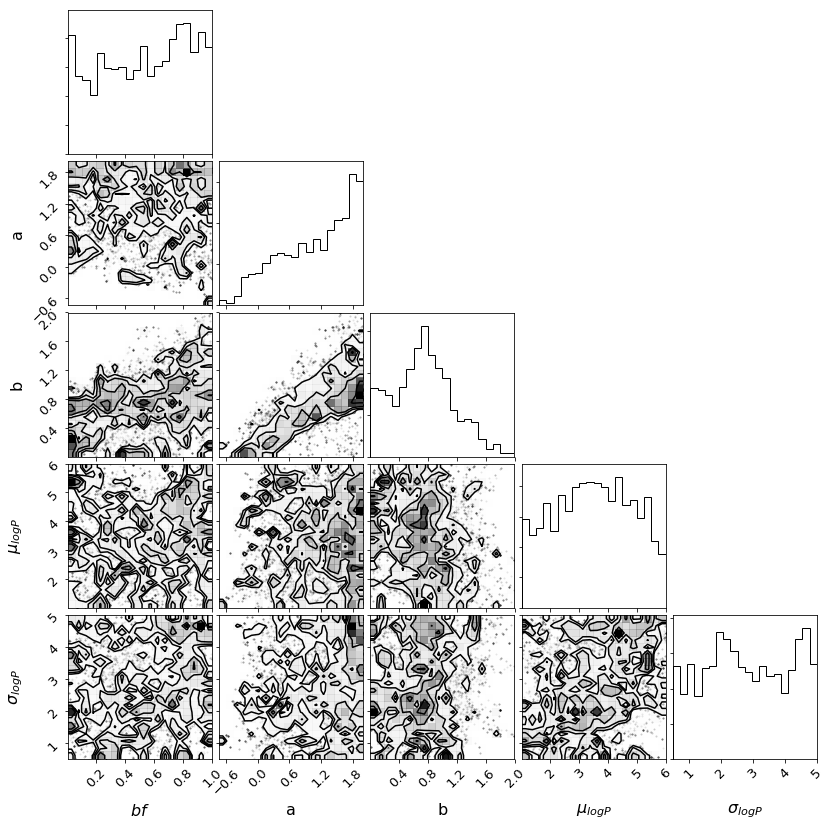

In [22]:
fig = corner.corner(samples, labels=["$bf$","a","b", "$\mu_{logP}$", "$\sigma_{logP}$"],
                    label_kwargs=dict(fontsize=16)
                    )
fig.savefig('smc-corner-plot.pdf')

In [23]:
sampler.acceptance_fraction

array([0.289, 0.292, 0.296, 0.315, 0.33 , 0.291, 0.344, 0.307, 0.287,
       0.304, 0.346, 0.315, 0.281, 0.317])

In [18]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py
%run likelihood_no_mcmc.py

In [2]:
from multiprocessing import Pool
aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer_lmc = pool.map(lnlh, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0


Process ForkPoolWorker-3:
Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/cody/an

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwa

KeyboardInterrupt
Process ForkPoolWorker-9:
Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [ ]:
# Now with SMC
%run likelihood_no_mcmc.py
aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer_smc = pool.map(lnlh, aa)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)
# fig.savefig('binary-fraction-both.pdf')
plt.show()

### Similar Distributions
I want to make plots for similar distributions of LOGG FE_H and TEFF.

In [71]:
def same_dat(table1, table2,  temp_lim = 250, logg_lim = 0.2, feh_lim = 0.2, snr_lim = 100):
    """
    Makes the data between two tables similar with in some limit
    
    Inputs
    ---------
    table1:  Should be the larger table that we want cut down
    table2:  Should be the smaller table that we want to compare the larger table to
    limit:   Tollerence that we want to compare the data to.
    
    Output
    ----------
    table1:  Modified table1 only keeping data points that are close to table2
    """
    # For each row in all_average_data, find isochrone rows that have similar
    # values, and make a list of all of those entries.
    dtype_list = []
    table1_foo = Table(table1, copy = True)
    table2_foo = Table(table2, copy = True)
    for n in range(len(table1_foo.dtype)):
        dtype_list.append(table1_foo.dtype[n])
    
    table3_foo = Table(names = table1_foo.colnames, dtype = dtype_list)
    rr = []
    for j in range(len(table2)):
        gd, = np.where((np.abs(table1_foo['TEFF'] - table2_foo['TEFF'][j]) < temp_lim) &
                       (np.abs(table1_foo['LOGG'] - table2_foo['LOGG'][j]) < logg_lim) &
                       (np.abs(table1_foo['FE_H'] - table2_foo['FE_H'][j]) < feh_lim ) #&
                       #(np.abs(table1_foo['VERR'] - table2['VERR'][j]) < snr_lim )
                      )
                       
        #print(gd, type(gd))
        if len(gd) == 1:
            table3_foo.add_row(table1_foo[gd[0]])
            table1_foo.remove_row(gd[0])
            #print(len(table1_foo))
        elif len(gd) > 2:
            rand = np.random.randint(0,len(gd))
            table3_foo.add_row(table1_foo[gd[rand]])
            table1_foo.remove_row(gd[rand])
        else:
            rr.append(j)
    
    table2_foo.remove_rows(rr)

    return table3_foo, table2_foo

In [29]:
print(len(lmc), len(smc))
lmc_same_g, smc_same_g = same_dat(lmc, smc, logg_lim = 0.05)
print(len(lmc), len(smc))

2080 641
2080 641


In [30]:
len(lmc_same_g)

447

In [31]:
import datetime as dt
import numpy as np
from lnlikelihood import lnlikelihood
from error_with_jitter import error_with_jitter
from binary_fraction import binary_fraction

def lnlh_lmc_sg(a):
    b = 0.61
    gal = lmc_same_g
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        print("Starting", n, dt.datetime.now())
        lnl.append(lnlikelihood(detection_rate_j,
                                50,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n, dt.datetime.now())
    return lnl

def lnlh_smc_sg(a):
    b = 0.61
    gal = smc_same_g
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                50,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

In [32]:
aa = [0.8, 0.6, 0.4, 0.2, 0]

pool = Pool()
answer_lmc_sg = pool.map(lnlh_lmc_sg, aa)

Starting 0 2019-04-05 13:24:10.959540
Starting 0 2019-04-05 13:24:10.959621
Starting 0 2019-04-05 13:24:10.960388
Starting 0 2019-04-05 13:24:11.018379
Starting 0 2019-04-05 13:24:11.018570
Done with, 0 2019-04-05 13:24:24.304334
Starting 1 2019-04-05 13:24:24.305763
Done with, 0 2019-04-05 13:24:24.442843
Done with, 0 2019-04-05 13:24:24.443178
Starting 1 2019-04-05 13:24:24.444524
Starting 1 2019-04-05 13:24:24.444388
Done with, 0 2019-04-05 13:24:34.324321
Starting 1 2019-04-05 13:24:34.326385
Done with, 0 2019-04-05 13:24:34.355305
Starting 1 2019-04-05 13:24:34.356981
Done with, 1 2019-04-05 13:24:38.966801
Starting 2 2019-04-05 13:24:38.968254
Done with, 1 2019-04-05 13:24:38.969247
Starting 2 2019-04-05 13:24:38.970636
Done with, 1 2019-04-05 13:24:39.169146
Starting 2 2019-04-05 13:24:39.171134
Done with, 1 2019-04-05 13:24:50.969506
Starting 2 2019-04-05 13:24:50.971128
Done with, 2 2019-04-05 13:24:54.990438
Starting 3 2019-04-05 13:24:54.992044
Done with, 2 2019-04-05 13:24:

Starting 19 2019-04-05 13:35:16.112024
Done with, 21 2019-04-05 13:35:24.616065
Starting 22 2019-04-05 13:35:24.617406
Done with, 20 2019-04-05 13:35:32.365911
Starting 21 2019-04-05 13:35:32.367249
Done with, 21 2019-04-05 13:35:40.650013
Starting 22 2019-04-05 13:35:40.651407
Done with, 21 2019-04-05 13:36:05.496703
Starting 22 2019-04-05 13:36:05.498019
Done with, 19 2019-04-05 13:36:08.930120
Starting 20 2019-04-05 13:36:08.931447
Done with, 22 2019-04-05 13:36:20.825319
Starting 23 2019-04-05 13:36:20.826998
Done with, 22 2019-04-05 13:36:22.749364
Starting 23 2019-04-05 13:36:22.751743
Done with, 21 2019-04-05 13:36:28.283953
Starting 22 2019-04-05 13:36:28.285454
Done with, 20 2019-04-05 13:36:48.470753
Starting 21 2019-04-05 13:36:48.473565
Done with, 23 2019-04-05 13:37:04.912892
Starting 24 2019-04-05 13:37:04.914281
Done with, 22 2019-04-05 13:37:07.357778
Starting 23 2019-04-05 13:37:07.359470
Done with, 22 2019-04-05 13:37:10.629931
Starting 23 2019-04-05 13:37:10.631287
D

Done with, 39 2019-04-05 13:57:18.188787
Starting 40 2019-04-05 13:57:18.190429
Done with, 43 2019-04-05 13:57:54.549179
Starting 44 2019-04-05 13:57:54.550703
Done with, 39 2019-04-05 13:58:16.711444
Starting 40 2019-04-05 13:58:16.713644
Done with, 41 2019-04-05 13:58:23.259648
Starting 42 2019-04-05 13:58:23.261302
Done with, 40 2019-04-05 13:58:23.758652
Starting 41 2019-04-05 13:58:23.760047
Done with, 42 2019-04-05 13:58:43.968351
Starting 43 2019-04-05 13:58:43.970308
Done with, 44 2019-04-05 13:59:04.431688
Starting 45 2019-04-05 13:59:04.432984
Done with, 40 2019-04-05 13:59:22.025260
Starting 41 2019-04-05 13:59:22.026568
Done with, 41 2019-04-05 13:59:30.505722
Starting 42 2019-04-05 13:59:30.506994
Done with, 42 2019-04-05 14:00:06.043682
Starting 43 2019-04-05 14:00:06.045188
Done with, 45 2019-04-05 14:00:15.989346
Starting 46 2019-04-05 14:00:15.990896
Done with, 43 2019-04-05 14:00:18.121540
Starting 44 2019-04-05 14:00:18.123155
Done with, 41 2019-04-05 14:01:08.542461

In [33]:
pool = Pool()
answer_smc_sg = pool.map(lnlh_smc_sg, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 1
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 4
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 5
Done with, 7
Done with, 7
Done with, 6
Done with, 8
Done with, 6
Done with, 8
Done with, 8
Done with, 7
Done with, 7
Done with, 9
Done with, 9
Done with, 8
Done with, 10
Done with, 10
Done with, 9
Done with, 8
Done with, 9
Done with, 11
Done with, 11
Done with, 10
Done with, 9
Done with, 12
Done with, 10
Done with, 11
Done with, 12
Done with, 10
Done with, 11
Done with, 12
Done with, 13
Done with, 13
Done with, 12
Done with, 11
Done with, 13
Done with, 14
Done with, 13
Done with, 14
Done with, 15
Done with, 14
Done with, 12
Done with, 14
Done with, 15


In [34]:
import pickle

saveObject = (answer_lmc, answer_smc, answer_lmc_sg, answer_smc_sg)
with open("binary-fraction-checkpoint-2019-03-20","wb") as f:
    pickle.dump(saveObject, f)

# Start Here Next Time

In [35]:
import pickle
with open("binary-fraction-checkpoint-2019-03-20", "rb") as f:
    answer_lmc, answer_smc, answer_lmc_sg, answer_smc_sg  = pickle.load(f)

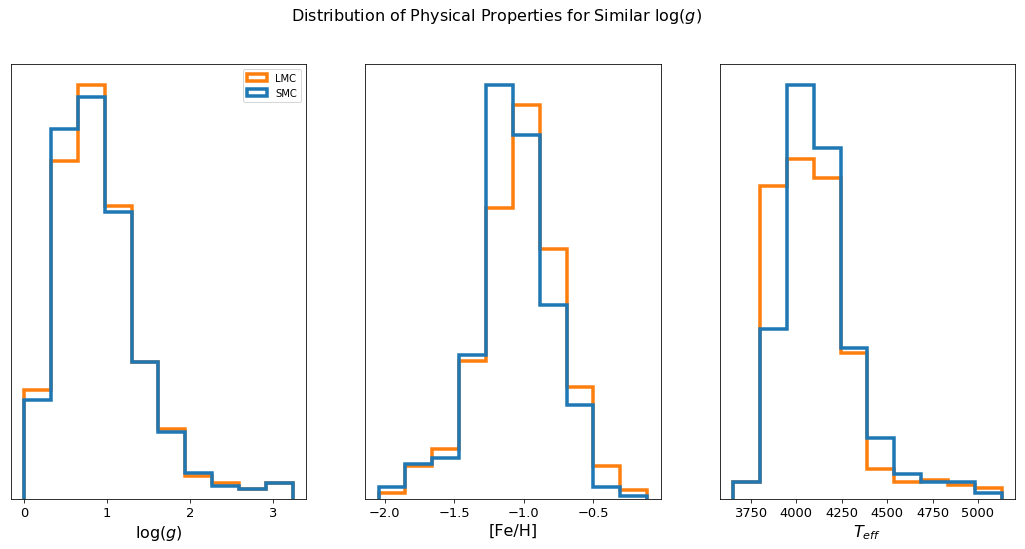

In [36]:
fig, ax = plt.subplots(1, 3, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].hist([smc_same_g['LOGG'], lmc_same_g['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"],)
ax[1].hist([smc_same_g['FE_H'], lmc_same_g['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[2].hist([smc_same_g['TEFF'], lmc_same_g['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0].legend()

ax[0].set_xlabel("$\log(g)$", size = 16)
ax[1].set_xlabel("[Fe/H]", size = 16)
ax[2].set_xlabel("$T_{eff}$", size = 16)

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

fig.suptitle("Distribution of Physical Properties for Similar $\log(g)$", size = 16)
# fig.subplots_adjust(top = 0.89)
fig.savefig("logg-hist-prop.pdf")
plt.show()

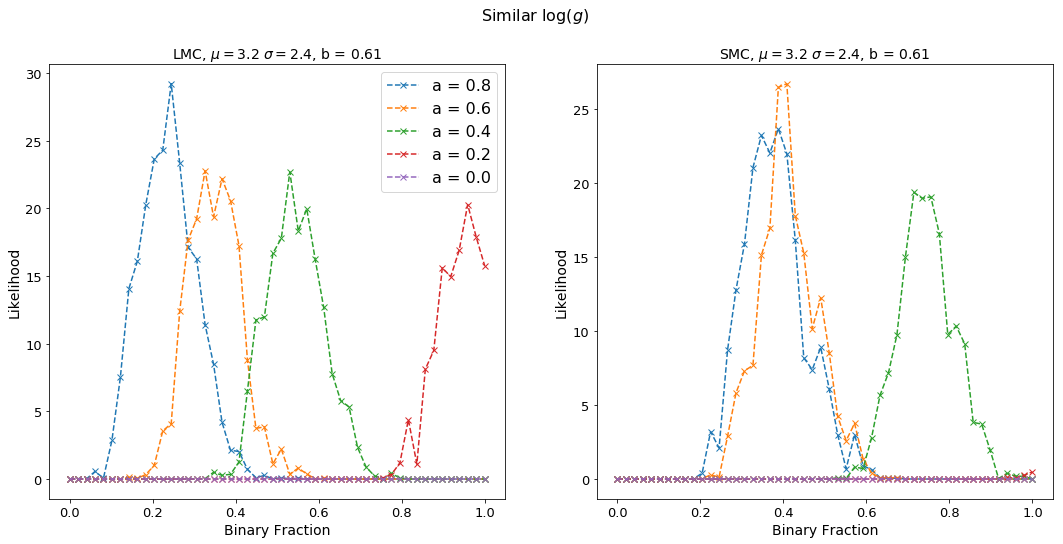

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sg[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sg[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sg[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sg[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sg[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sg[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sg[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sg[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sg[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sg[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Binary Fraction",size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61',size = 14)
ax[1].set_xlabel("Binary Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

fig.suptitle("Similar $\log(g)$", size = 16)
fig.savefig("likelihood-similar-logg.pdf")
plt.show()

In [38]:
lmc_same_f, smc_same_f = same_dat(lmc, smc, temp_lim = 500, logg_lim = 0.5, feh_lim = 0.02,)
print(len(lmc_same_f), len(smc_same_f))

481 481


In [39]:
import datetime as dt
def lnlh_lmc_sf(a):
    b = 0.61
    gal = lmc_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                50,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

def lnlh_smc_sf(a):
    b = 0.61
    gal = smc_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                50,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

In [40]:
# Run the same thing but making the Iron distribution similar LMC
aa = [0.8, 0.6, 0.4, 0.2, 0]
from multiprocessing import Pool
pool = Pool()
answer_lmc_sf = pool.map(lnlh_lmc_sf, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 1
Done with, 2
Done with, 2
Done with, 3
Done with, 2
Done with, 3
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 7
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 8
Done with, 10
Done with, 9
Done with, 9
Done with, 11
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 12
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 13
Done with, 12
Done with, 13
Done with, 14
Done with, 12
Done with, 13
Done with, 12
Done with, 15
Done with, 14
Done with, 13
Done with, 13
Done with, 14
Done with, 14


In [41]:
# Run the same thing but making the Iron distribution similar SMC
pool = Pool()
answer_smc_sf = pool.map(lnlh_smc_sf, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 1
Done with, 2
Done with, 1
Done with, 3
Done with, 3
Done with, 3
Done with, 2
Done with, 2
Done with, 4
Done with, 4
Done with, 4
Done with, 3
Done with, 3
Done with, 5
Done with, 5
Done with, 4
Done with, 5
Done with, 6
Done with, 6
Done with, 4
Done with, 5
Done with, 6
Done with, 5
Done with, 7
Done with, 7
Done with, 7
Done with, 6
Done with, 6
Done with, 8
Done with, 7
Done with, 8
Done with, 9
Done with, 8
Done with, 7
Done with, 10
Done with, 9
Done with, 8
Done with, 8
Done with, 9
Done with, 11
Done with, 10
Done with, 9
Done with, 9
Done with, 10
Done with, 12
Done with, 10
Done with, 11
Done with, 11
Done with, 13
Done with, 10
Done with, 11
Done with, 12
Done with, 12
Done with, 14
Done with, 12
Done with, 13
Done with, 11
Done with, 13
Done with, 15
Done with, 12
Done with, 14
Done with, 16
Done with, 13
Done with, 14
Done with, 13


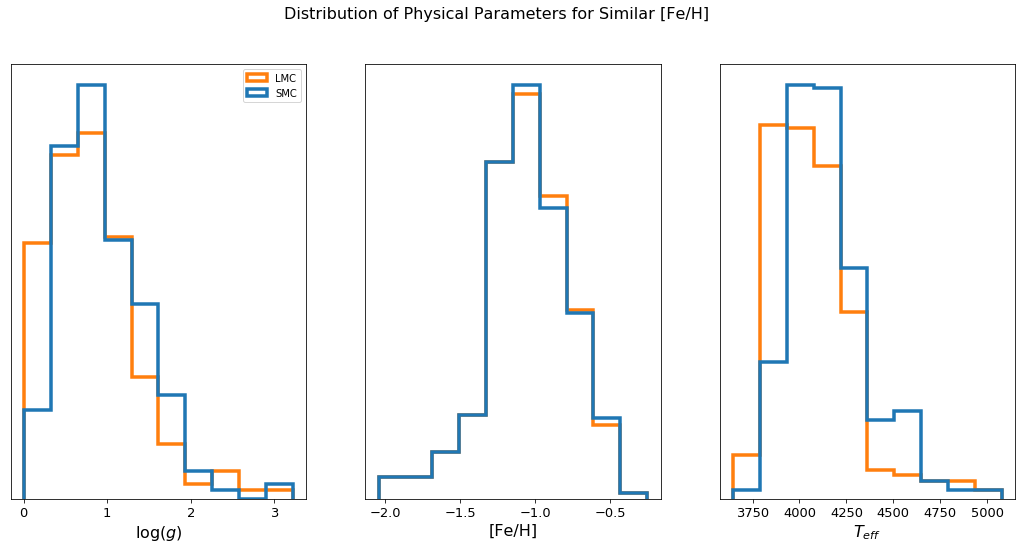

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].hist([smc_same_f['LOGG'], lmc_same_f['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1].hist([smc_same_f['FE_H'], lmc_same_f['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[2].hist([smc_same_f['TEFF'], lmc_same_f['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0].legend()

ax[0].set_xlabel("$\log(g)$", size = 16)
ax[1].set_xlabel("[Fe/H]", size = 16)
ax[2].set_xlabel("$T_{eff}$", size = 16)

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

fig.suptitle("Distribution of Physical Parameters for Similar [Fe/H]", size = 16)
fig.savefig("feh-hist-prop.pdf")
plt.show()

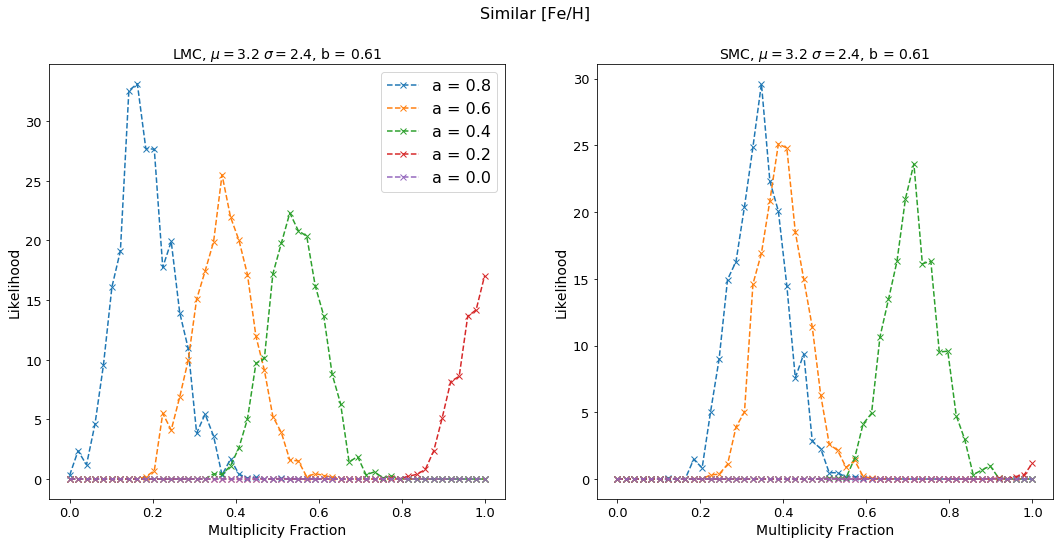

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sf[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sf[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sf[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sf[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_sf[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sf[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sf[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sf[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sf[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_sf[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction",size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61',size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

fig.suptitle("Similar [Fe/H]", size = 16)
fig.savefig("likelihood-similar-iron.pdf")
plt.show()

# R12.
Doing this all over again but using some r12 data, that has NOT go through ASPCAP. Just going to see what happens.

These files were make in the notebook "2019-03-08"

In [55]:
import pickle as rick
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u

In [56]:
lmc12 = rick.load(open("/home/cody/Binary Search/r12-noaspcap-lmc-filtered.pck", 'rb'))
smc12 = rick.load(open("/home/cody/Binary Search/r12-noaspcap-smc-filtered.pck", 'rb'))

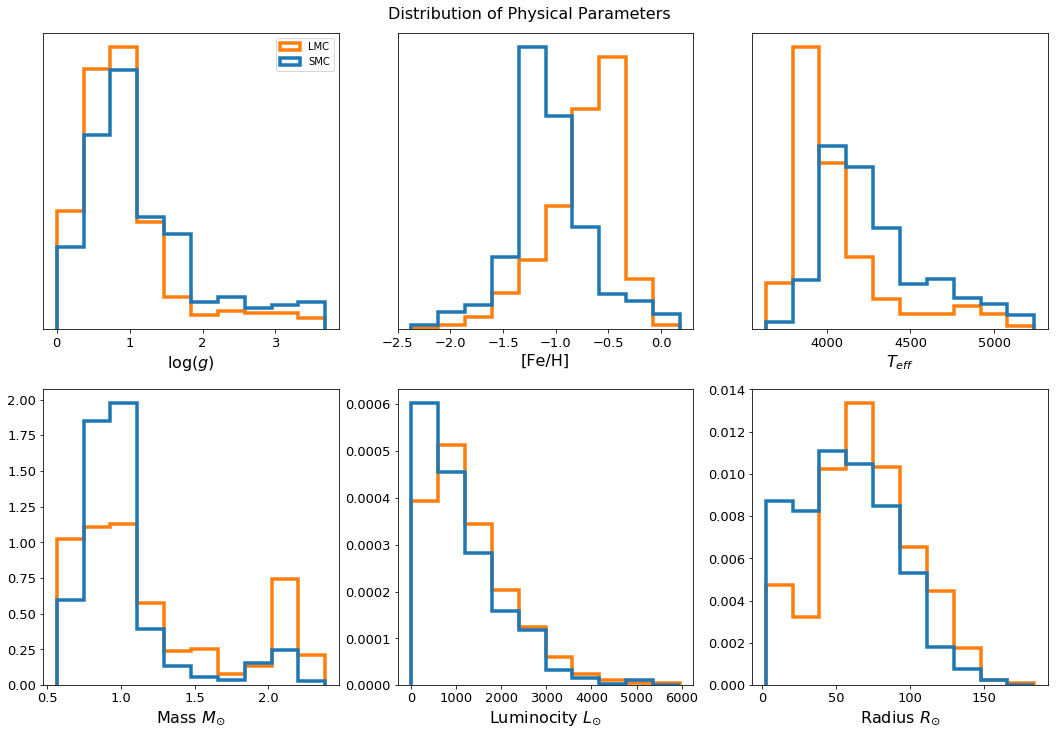

In [57]:
fig, ax = plt.subplots(2, 3, figsize = (18,12))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax[0][0].hist([smc12['LOGG'], lmc12['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[0][1].hist([smc12['FE_H'], lmc12['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[0][2].hist([smc12['TEFF'], lmc12['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[1][0].hist([smc12['ISO_MEANM'], lmc12['ISO_MEANM']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1][1].hist([smc12['ISO_MEANL'], lmc12['ISO_MEANL']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[1][2].hist([smc12['ISO_MEANR'], lmc12['ISO_MEANR']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0][0].legend()

ax[0][0].set_xlabel("$\log(g)$", size = 16)
ax[0][1].set_xlabel("[Fe/H]", size = 16)
ax[0][2].set_xlabel("$T_{eff}$", size = 16)

ax[1][0].set_xlabel("Mass $M_{\odot}$", size = 16)
ax[1][1].set_xlabel("Luminocity $L_{\odot}$", size = 16)
ax[1][2].set_xlabel("Radius $R_{\odot}$", size = 16)

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])


fig.suptitle("Distribution of Physical Parameters", size = 16, y = 0.91)
# fig.savefig('properties-hist.pdf')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

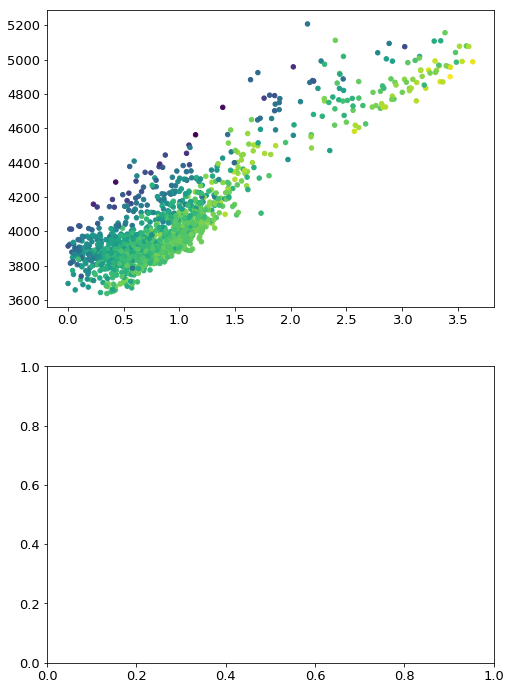

In [58]:
fig, ax = plt.subplots(2,1, figsize = (8,12))
ax[0].scatter(lmc12['LOGG'], lmc12['TEFF'],s=20, c=lmc12['FE_H'],)
cbar = ax[0].colorbar()
cbar.set_label('[Fe/H]',size=18, rotation=270, labelpad=20)
plt.ylabel("$T_{eff}$ (K)", size = 18)
plt.xlabel("$\log\,g$", size = 18)
plt.title("LMC", size=18)
plt.show()

fig = plt.figure(figsize = (8,8))
plt.scatter(smc12['LOGG'], smc12['TEFF'], s=20, c=smc12['FE_H'],)
cbar = plt.colorbar()
cbar.set_label('[Fe/H]',size=18, rotation=270, labelpad=20)
plt.ylabel("$T_{eff}$ (K)", size = 18)
plt.xlabel("$\log\,g$", size = 18)
plt.title("SMC", size=18)
fig.savefig("smc-params.pdf")

In [60]:
%run synthetic_fractions.py

In [61]:
fraction_lmc = synthetic_fractions(250,
                                   lmc12,
                                   0.2,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [62]:
fraction_smc = synthetic_fractions(250,
                                   smc12,
                                   0.6,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [63]:
# Adds the extra jitter to the errors
a, b = 0.6, 0.6
lmc_err_j = error_with_jitter(lmc12['RADIAL_ERR'], a, b, lmc12['LOGG'])
lmc_detection = binary_fraction(lmc12['RADIALV'], lmc_err_j)
smc_err_j = error_with_jitter(smc12['RADIAL_ERR'], a, b, smc12['LOGG'])
smc_detection = binary_fraction(smc12['RADIALV'], smc_err_j)

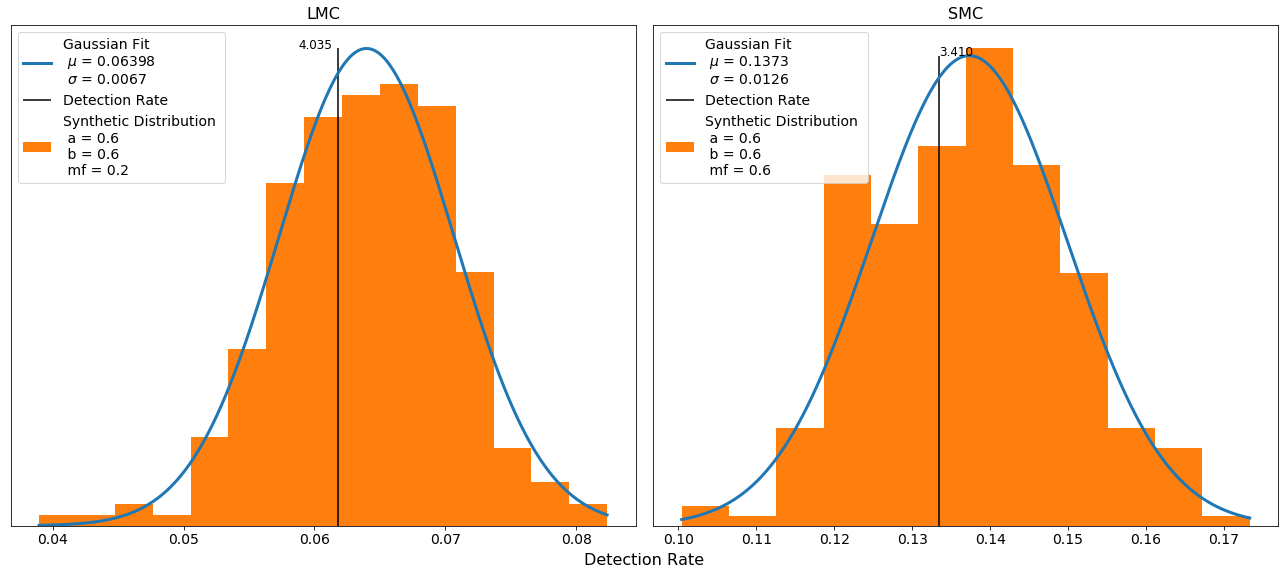

In [65]:
import scipy.stats as sps
fig, ax = plt.subplots(1,2, figsize = (18,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 500)

smc_mean = np.mean(fraction_smc)
smc_std = np.std(fraction_smc)
smc_skew = sps.skew(fraction_smc)

lnl_SMC = -1/2*((smc_detection - smc_mean)**2 / smc_std**2 + np.log(2*np.pi * smc_std**2))

xs = np.linspace(min(fraction_smc), max(fraction_smc), 500)

ax[0].plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
ax[0].hist(fraction_lmc, bins = 'auto', density = True)
ax[0].vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)))
ax[0].set_yticks([])
ax[0].set_title("LMC", size = 16)
ax[0].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(lmc_mean, 4, lmc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.2"],
             prop = {"size":14}) 
ax[0].text(lmc_detection-.003,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)

ax[1].plot(xs, sps.norm.pdf(xs, smc_mean, smc_std), linewidth = 3)
ax[1].hist(fraction_smc, bins = 'auto', density = True)
ax[1].vlines(smc_detection, 0, max(sps.norm.pdf(xs, smc_mean, smc_std)))
ax[1].set_yticks([])
ax[1].set_title("SMC", size = 16)
ax[1].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(smc_mean, 4, smc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.6"],
             prop = {"size":14}, loc = 2)
ax[1].text(smc_detection,
           max(sps.norm.pdf(xs, smc_mean, smc_std))
           , "{0:.{1}f}".format(lnl_SMC,3), fontsize=12)

ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
# fig.savefig("synthetic-example.pdf")
plt.show()

In [66]:
import datetime as dt
def lnlh_lmc(a):
    b = 0.61
    gal = lmc12
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n, dt.datetime.now())
    return lnl

def lnlh_smc(a):
    b = 0.61
    gal = smc12
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n, dt.datetime.now())
    return lnl

%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py
%run likelihood_no_mcmc.py

In [67]:
from multiprocessing import Pool

aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer_lmc = pool.map(lnlh_lmc, aa)

Done with, 0 2019-04-29 11:59:43.889324
Done with, 0 2019-04-29 11:59:45.088154
Done with, 0 2019-04-29 11:59:46.838438
Done with, 0 2019-04-29 12:02:15.330434
Done with, 0 2019-04-29 12:02:18.304541
Done with, 1 2019-04-29 12:03:29.335075
Done with, 1 2019-04-29 12:03:33.720252
Done with, 1 2019-04-29 12:03:34.097295
Done with, 1 2019-04-29 12:06:34.080318
Done with, 1 2019-04-29 12:06:34.734406
Done with, 2 2019-04-29 12:07:44.426760
Done with, 2 2019-04-29 12:10:44.876188
Done with, 2 2019-04-29 12:10:45.864311
Done with, 2 2019-04-29 12:10:56.956329
Done with, 2 2019-04-29 12:10:58.988561
Done with, 3 2019-04-29 12:12:19.617610
Done with, 3 2019-04-29 12:15:19.906261
Done with, 3 2019-04-29 12:15:22.741881
Done with, 4 2019-04-29 12:17:19.169990
Done with, 3 2019-04-29 12:18:21.044190
Done with, 3 2019-04-29 12:18:21.300157
Done with, 4 2019-04-29 12:20:19.986107
Done with, 4 2019-04-29 12:21:41.210097
Done with, 4 2019-04-29 12:23:20.577406
Done with, 5 2019-04-29 12:24:03.478047


Done with, 41 2019-04-29 21:31:43.056042
Done with, 39 2019-04-29 21:33:03.391724
Done with, 41 2019-04-29 21:34:39.510662
Done with, 41 2019-04-29 21:38:00.204879
Done with, 40 2019-04-29 21:51:36.023760
Done with, 42 2019-04-29 21:51:49.073714
Done with, 42 2019-04-29 21:57:41.147001
Done with, 42 2019-04-29 22:05:36.931092
Done with, 40 2019-04-29 22:07:53.978590
Done with, 41 2019-04-29 22:11:26.686382
Done with, 43 2019-04-29 22:12:16.207936
Done with, 43 2019-04-29 22:26:06.024060
Done with, 42 2019-04-29 22:31:42.973767
Done with, 44 2019-04-29 22:33:10.004397
Done with, 43 2019-04-29 22:34:50.179994
Done with, 41 2019-04-29 22:43:28.751015
Done with, 44 2019-04-29 22:47:02.423359
Done with, 43 2019-04-29 22:52:21.163171
Done with, 45 2019-04-29 22:54:25.534371
Done with, 45 2019-04-29 23:11:37.226624
Done with, 44 2019-04-29 23:12:43.111907
Done with, 42 2019-04-29 23:12:54.927668
Done with, 44 2019-04-29 23:13:25.948532
Done with, 46 2019-04-29 23:16:05.323036
Done with, 45 20

In [68]:
pool = Pool()
answer_smc = pool.map(lnlh_smc, aa)

Done with, 0 2019-04-30 02:06:52.555867
Done with, 0 2019-04-30 02:06:53.605844
Done with, 0 2019-04-30 02:06:53.671355
Done with, 0 2019-04-30 02:07:45.444770
Done with, 0 2019-04-30 02:08:14.487874
Done with, 1 2019-04-30 02:08:54.691270
Done with, 1 2019-04-30 02:09:23.000970
Done with, 1 2019-04-30 02:09:23.610205
Done with, 1 2019-04-30 02:09:45.988830
Done with, 1 2019-04-30 02:10:56.476356
Done with, 2 2019-04-30 02:11:09.142150
Done with, 2 2019-04-30 02:11:59.821949
Done with, 2 2019-04-30 02:13:04.295890
Done with, 2 2019-04-30 02:13:09.905929
Done with, 2 2019-04-30 02:13:21.640469
Done with, 3 2019-04-30 02:13:35.691996
Done with, 3 2019-04-30 02:14:25.700017
Done with, 3 2019-04-30 02:15:35.529602
Done with, 4 2019-04-30 02:16:13.331626
Done with, 4 2019-04-30 02:17:04.774585
Done with, 3 2019-04-30 02:17:22.661899
Done with, 3 2019-04-30 02:17:31.331843
Done with, 4 2019-04-30 02:18:15.453935
Done with, 5 2019-04-30 02:19:27.808732
Done with, 5 2019-04-30 02:19:59.822646


Done with, 42 2019-04-30 07:01:53.695215
Done with, 38 2019-04-30 07:02:29.804385
Done with, 41 2019-04-30 07:06:07.563985
Done with, 40 2019-04-30 07:08:42.052455
Done with, 43 2019-04-30 07:12:33.552523
Done with, 41 2019-04-30 07:15:09.129054
Done with, 42 2019-04-30 07:16:34.148016
Done with, 39 2019-04-30 07:18:21.660592
Done with, 41 2019-04-30 07:20:04.500468
Done with, 42 2019-04-30 07:25:35.040385
Done with, 43 2019-04-30 07:27:12.569515
Done with, 42 2019-04-30 07:30:34.627443
Done with, 44 2019-04-30 07:32:09.251691
Done with, 43 2019-04-30 07:36:12.676230
Done with, 40 2019-04-30 07:36:35.904065
Done with, 44 2019-04-30 07:38:07.302398
Done with, 43 2019-04-30 07:41:15.153652
Done with, 44 2019-04-30 07:47:02.374920
Done with, 45 2019-04-30 07:48:33.961202
Done with, 45 2019-04-30 07:49:14.050981
Done with, 41 2019-04-30 07:55:04.917622
Done with, 45 2019-04-30 07:58:07.835394
Done with, 44 2019-04-30 07:58:34.706489
Done with, 46 2019-04-30 07:59:48.187620
Done with, 46 20

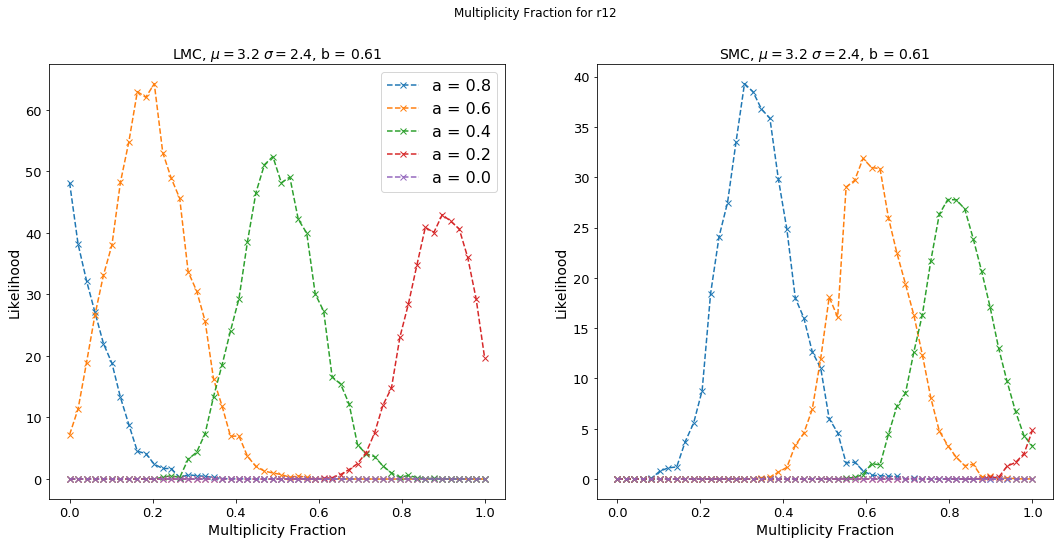

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
fig.suptitle("Multiplicity Fraction for r12")
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)
# fig.savefig('r12-binary-fraction.pdf')
plt.show()

In [72]:
lmc12_same_f, smc12_same_f = same_dat(lmc12, smc12, temp_lim = 500, logg_lim = 0.5, feh_lim = 0.02,)
print(len(lmc12_same_f), len(smc12_same_f))

420 420


In [73]:
5

5

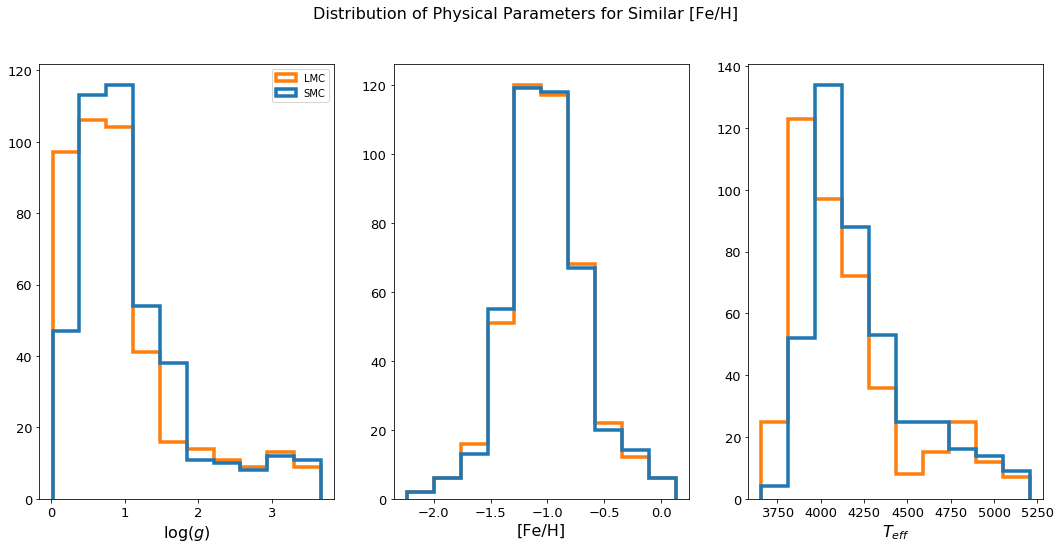

In [74]:
fig, ax = plt.subplots(1, 3, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].hist([smc12_same_f['LOGG'], lmc12_same_f['LOGG']],
           histtype='step',
           density= False,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1].hist([smc12_same_f['FE_H'], lmc12_same_f['FE_H']],
           histtype='step',
           density= False,
           linewidth = 3.5)
ax[2].hist([smc12_same_f['TEFF'], lmc12_same_f['TEFF']],
           histtype='step',
           density= False,
           linewidth = 3.5)

ax[0].legend()

ax[0].set_xlabel("$\log(g)$", size = 16)
ax[1].set_xlabel("[Fe/H]", size = 16)
ax[2].set_xlabel("$T_{eff}$", size = 16)

# ax[0].set_yticks([])
# ax[1].set_yticks([])
# ax[2].set_yticks([])

fig.suptitle("Distribution of Physical Parameters for Similar [Fe/H]", size = 16)
fig.savefig("feh-hist-prop.pdf")
plt.show()

In [75]:
import datetime as dt
def lnlh_lmc12_sf(a):
    b = 0.61
    gal = lmc12_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                150,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

def lnlh_smc12_sf(a):
    b = 0.61
    gal = smc12_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                150,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

In [77]:
pool = Pool()
answer_lmc12_sf = pool.map(lnlh_lmc12_sf, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 4
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 5
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 6
Done with, 7
Done with, 7
Done with, 8
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 8
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 9
Done with, 11
Done with, 11
Done with, 10
Done with, 10
Done with, 11
Done with, 12
Done with, 11
Done with, 12
Done with, 11
Done with, 12
Done with, 13
Done with, 13
Done with, 12
Done with, 12
Done with, 13
Done with, 14
Done with, 14
Done with, 13
Done with, 13
Done with, 14
Done with, 14
Done with, 14


Process ForkPoolWorker-37:
Process ForkPoolWorker-33:
Process ForkPoolWorker-35:
Process ForkPoolWorker-34:


KeyboardInterrupt: 

Process ForkPoolWorker-38:
Process ForkPoolWorker-39:
Process ForkPoolWorker-40:
Process ForkPoolWorker-36:
Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/cody/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, re

  File "/home/cody/Binary Search/bayesian likelihood/lnlikelihood.py", line 8, in lnlikelihood
    syn_fractions = synthetic_fractions(num_of_galaxies, cloud, bf, m_min, mu, sigma, a, b)
  File "/home/cody/Binary Search/bayesian likelihood/lnlikelihood.py", line 8, in lnlikelihood
    syn_fractions = synthetic_fractions(num_of_galaxies, cloud, bf, m_min, mu, sigma, a, b)
  File "<ipython-input-75-1e26fc2aeb60>", line 25, in lnlh_lmc12_sf
    b)
  File "/home/cody/Binary Search/bayesian likelihood/synthetic_fractions.py", line 33, in synthetic_fractions
    rv_syn, err_syn = synthetic_galaxy(cloud, bf, m_min, mu, sigma)
  File "/home/cody/Binary Search/bayesian likelihood/synthetic_fractions.py", line 33, in synthetic_fractions
    rv_syn, err_syn = synthetic_galaxy(cloud, bf, m_min, mu, sigma)
  File "/home/cody/Binary Search/bayesian likelihood/lnlikelihood.py", line 8, in lnlikelihood
    syn_fractions = synthetic_fractions(num_of_galaxies, cloud, bf, m_min, mu, sigma, a, b)
  File "

In [ ]:
pool = Pool()
answer_smc12_sf = pool.map(lnlh_smc12_sf, aa)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction",size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61',size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

fig.suptitle("Similar [Fe/H]", size = 16)
# fig.savefig("likelihood-similar-iron.pdf")
plt.show()

### Other iron cut
What if I didn't do a 'similar' process. But rather